<a href="https://colab.research.google.com/github/trisha123789/HOUSE_RENT_PREDICTION/blob/main/House_rent_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE NECESSARY LIBRARIES

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

LOAD THE DATASET

In [6]:
data = pd.read_csv('/content/House_Rent_Dataset.csv')

In [7]:
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


VIEW TOP ROWS

In [8]:
data.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [9]:
data.tail(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [25]:
data.dtypes

,0
Posted On,object
BHK,int64
Rent,int64
Size,int64
Floor,object
Area Type,object
Area Locality,object
City,object
Furnishing Status,object
Tenant Preferred,object


In [22]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


DATA CLEANING

CHECK TOTAL NUMBER OF MISSING VALUES

In [12]:
data.isnull().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


CHANGING THE DATA TYPE OF BATHROOM

In [26]:
data['Bathroom'] = data['Bathroom'].astype('object')

In [27]:
data.dtypes

,0
Posted On,object
BHK,int64
Rent,int64
Size,int64
Floor,object
Area Type,object
Area Locality,object
City,object
Furnishing Status,object
Tenant Preferred,object


In [13]:
data.isnull().sum().sum()

np.int64(0)

DROP ALL THE ROWS CONTAINING MISSING VALUES

In [11]:
data.dropna(inplace = True)

VIEW THE COUNT OF ROWS WHICH ARE DUPLICATE ROWS

In [17]:
data.duplicated().sum()

np.int64(0)

In [18]:
data[data.duplicated()]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact


DELETING THE ROWS HAVING DUPLICATED VALUES

In [20]:
data.drop_duplicates()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


EDA

univariate analysis

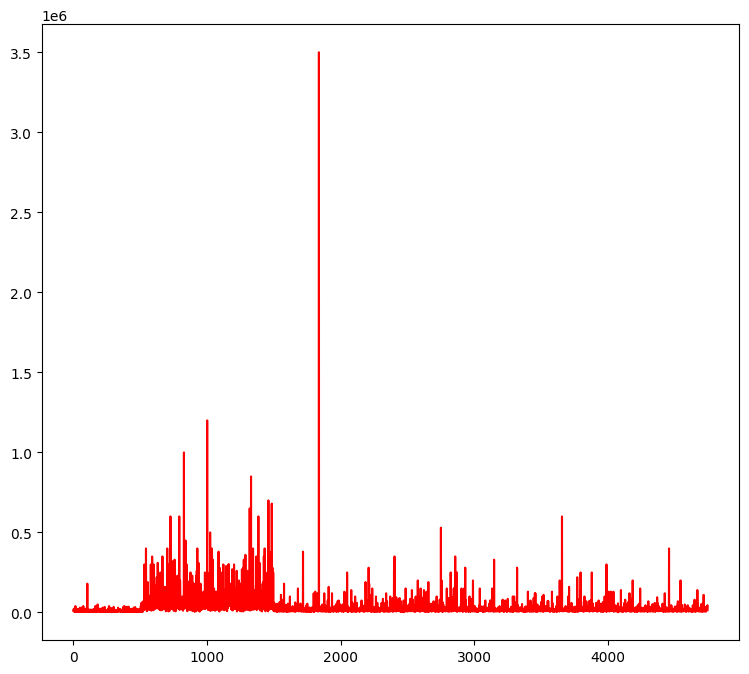

In [30]:
plt.figure(figsize = (9,8))
plt.plot(data['Rent'],color ='red',label='rent analysis')
plt.show()

OUTLIER DETECTION

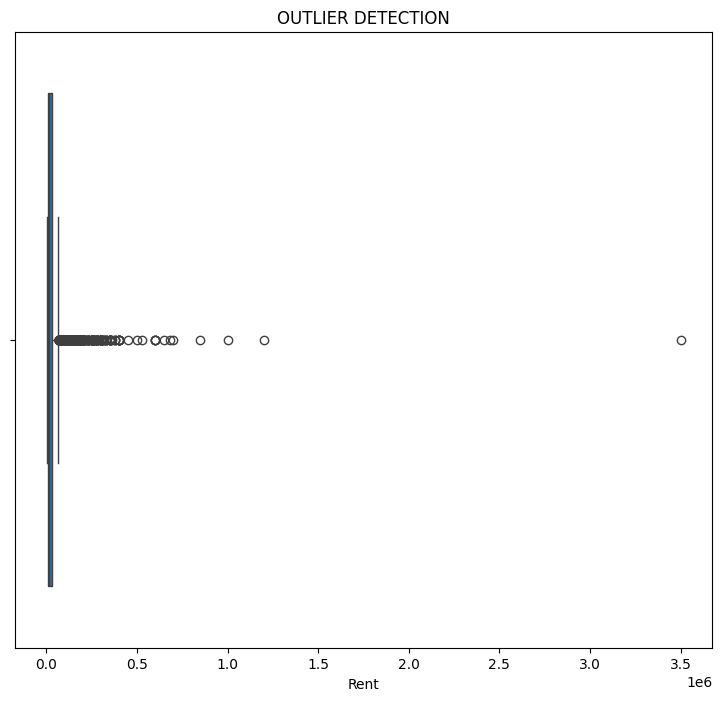

In [31]:
plt.figure(figsize = (9,8))
sns.boxplot(data = data,x='Rent')
plt.title('OUTLIER DETECTION')
plt.show()

BIVARIATE ANALYSIS   


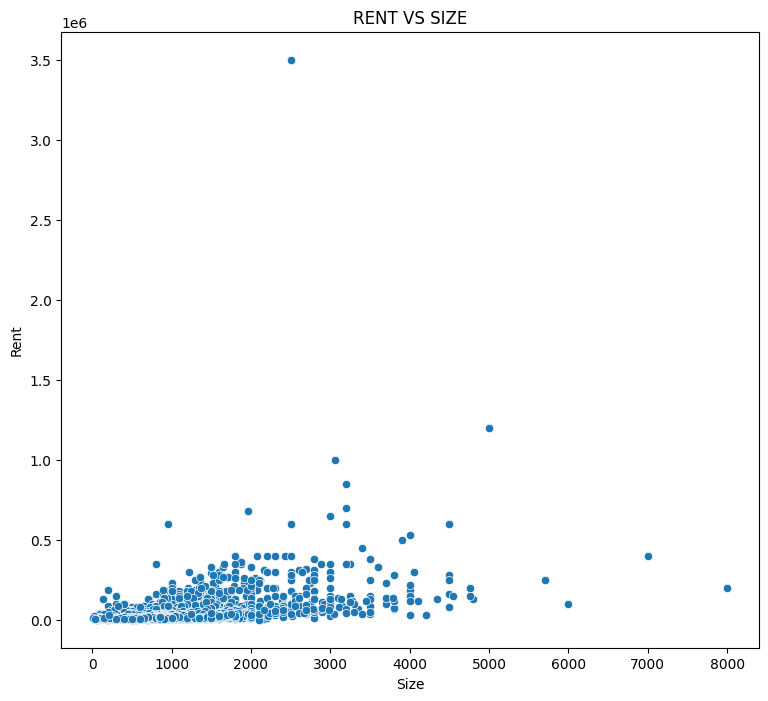

In [36]:
plt.figure(figsize=(9,8))
sns.scatterplot(x ='Size',y='Rent',data = data)
plt.title('RENT VS SIZE')
plt.show()

In [37]:
data['Bathroom'] = data['Bathroom'].astype('int')

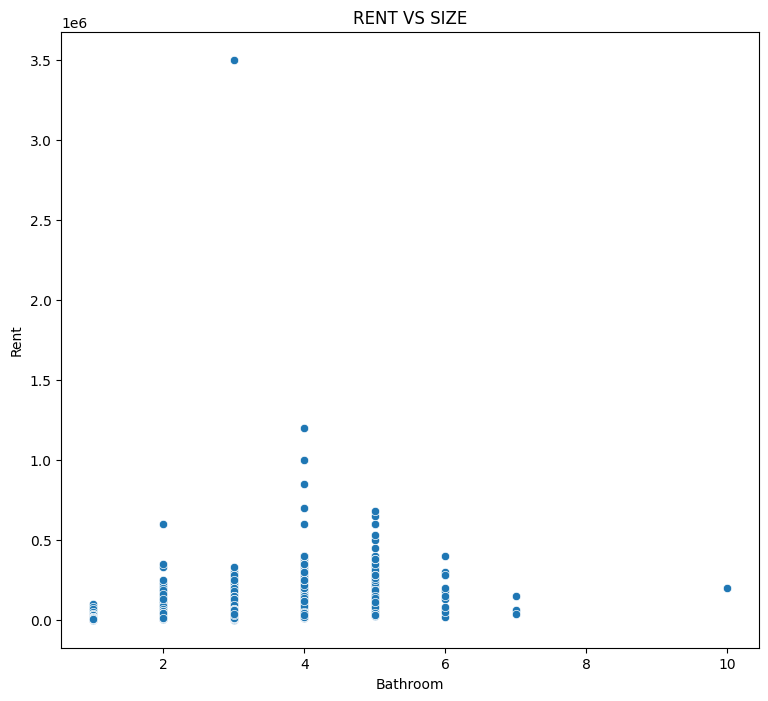

In [38]:
plt.figure(figsize=(9,8))
sns.scatterplot(x ='Bathroom',y='Rent',data = data)
plt.title('RENT VS SIZE')
plt.show()

MULTIVARIATE ANALYSIS

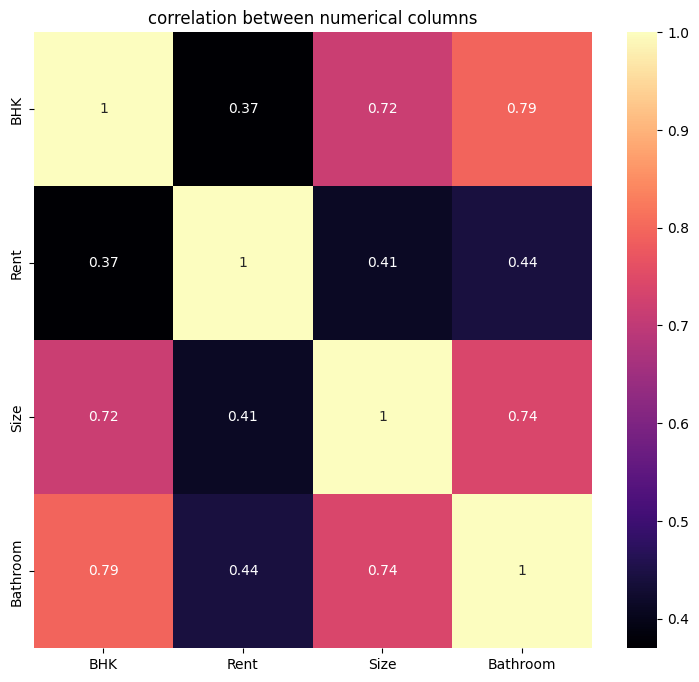

In [44]:
numerical_columns = data.select_dtypes(include = ['int64','float64'])
corr = numerical_columns.corr()
plt.figure(figsize = (9,8))
sns.heatmap(corr,annot = True,cmap = "magma")
plt.title("correlation between numerical columns")
plt.show()

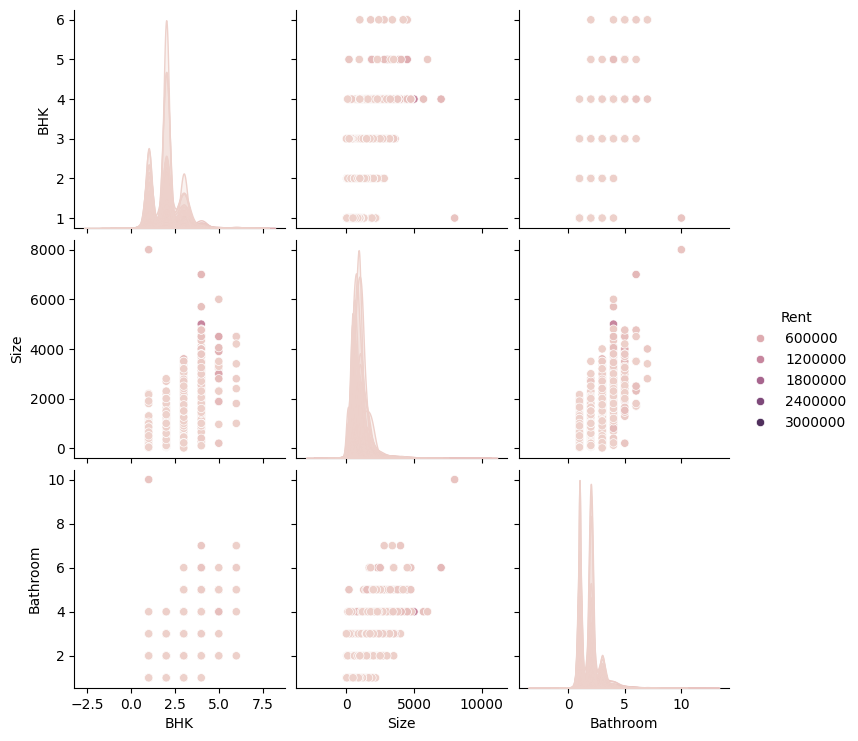

In [47]:
sns.pairplot(numerical_columns,hue='Rent')

MACHINE LEARNING PART - CREATING SIMPLE LINEAR REGRESSION MODEL AND ALSO REGRESSION METRICS

In [49]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [51]:
X = data.iloc[:,3].values

In [52]:
X

array([1100,  800, 1000, ..., 1750, 1500, 1000])

In [55]:
y = data.iloc[:,2].values

In [56]:
#splitting into testing and training variables
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [57]:
len(X_train)

3796

In [59]:
len(X_test)

950

In [61]:
len(y_train)

3796

In [62]:
len(y_test)

950

In [65]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

y_train = y_train.reshape(-1,1)

In [66]:
regressor = LinearRegression()

In [67]:
regressor.fit(X_train,y_train)

LinearRegression()

In [68]:
y_pred = regressor.predict(X_test)

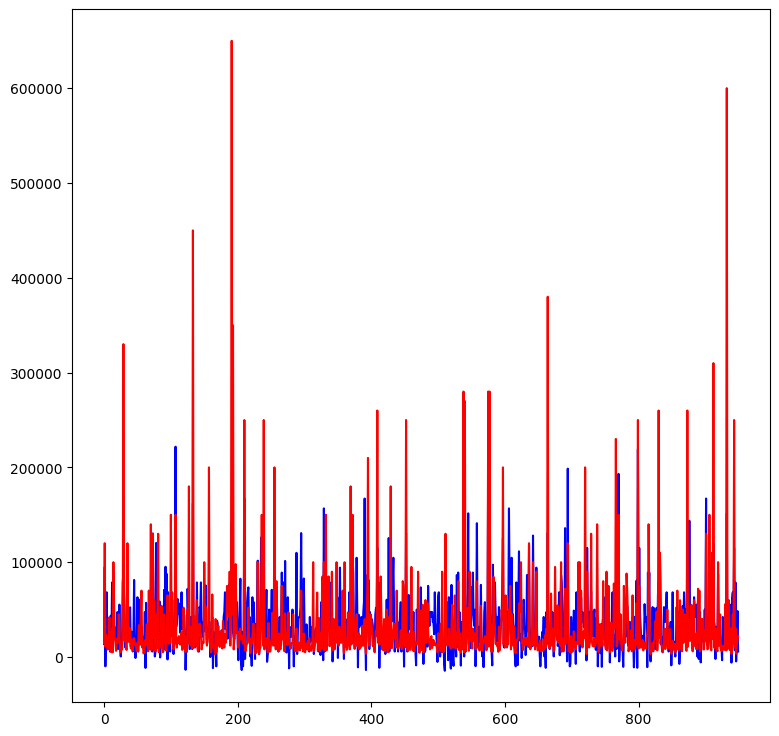

In [69]:
plt.figure(figsize=(9,9))
plt.plot(y_pred,color = 'Blue',label = 'predict')
plt.plot(y_test,color = 'red',label = 'test')
plt.show()

In [70]:
mean_absolute_error(y_test,y_pred)



2140969927.9618244

In [74]:
r2 = r2_score(y_test,y_pred)

In [75]:
mean_squared_error(y_test,y_pred)

2140969927.9618244

In [76]:
#calculating r2_adjacent
n = X_test.shape[0]
k = X_test.shape[1]
r2_adj = 1 - (1-r2) *(n-1)/(n-1-k)


In [77]:
print(r2_adj)

0.2819576591942822
